## Setup

In [2]:
source("/research/lab_reiberger/2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [3]:
p_load("dplyr", "ggplot2", "mice", "janitor", "POMA", "SummarizedExperiment", "EnhancedVolcano", "ggvenn", "PCAtools", "pheatmap", install = FALSE)

In [9]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]

In [10]:
metadata <- metadata %>% filter(sample_id %in% metabol$sample_id)

In [11]:
metabolomics_obj <- PomaSummarizedExperiment(target = metadata, features = metabol[2:ncol(metabol)])

In [7]:
cir_up <- read.csv("outputs/02_cir_up")
cir_down <- read.csv("outputs/02_cir_down")

psvd_up <- read.csv("outputs/02_psvd_up")
psvd_down <- read.csv("outputs/02_psvd_down")

In [6]:
cir_up$feature

[1] "glutamic_acid"            "aspartic_acid"           
 [3] "acetic_acid_c2_0"         "isopentyl_acetate"       
 [5] "isovaleric_acid_3_me_4_0" "taurocholic_acid"        
 [7] "propionic_acid_c3_0"      "pc_o_32_0"               
 [9] "citramalic_acid"          "lpc_o_18_1"              
[11] "palmitoleic_acid_16_1"    "valeric_acid_c5_0"       
[13] "oleic_acid_c18_1"         "lpc_o_16_0"              
[15] "hydroxy_glutamic_acid"    "succinic_acid"           
[17] "stearic_acid_18_0"        "palmitic_acid_16_0"      
[19] "orotic_acid"

## Venn

In [12]:
venn_dataframe <- list("Cirrhosis down" = cir_down$feature,
                       "Cirrhosis up" = cir_up$feature,
                        "PSVD up" = psvd_up$feature,
                        "PSVD down" = psvd_down$feature)

In [13]:
F1_D <- ggvenn(venn_dataframe,
  fill_color = c("#561965", "#561965", "#87d662", "#87d662"),
  stroke_size = 0.5, set_name_size = 4)

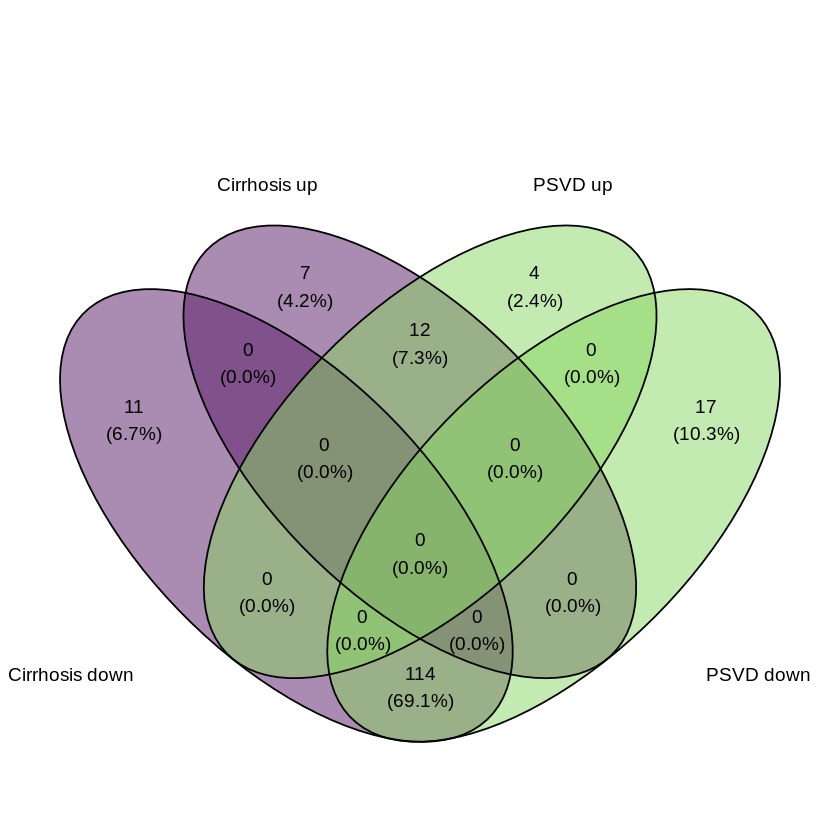

In [14]:
F1_D

In [27]:
cir_up_psvd_down <- intersect(venn_dataframe$`Cirrhosis down`, venn_dataframe$`PSVD up`)

In [28]:
cir_up_psvd_down

[1] "glutamic_acid"            "aspartic_acid"           
 [3] "acetic_acid_c2_0"         "isopentyl_acetate"       
 [5] "isovaleric_acid_3_me_4_0" "propionic_acid_c3_0"     
 [7] "citramalic_acid"          "lpc_o_18_1"              
 [9] "valeric_acid_c5_0"        "oleic_acid_c18_1"        
[11] "stearic_acid_18_0"        "palmitic_acid_16_0"

In [29]:
psvd_up_cir_down <- intersect(venn_dataframe$`PSVD down`, venn_dataframe$`Cirrhosis up`)

In [30]:
psvd_up_cir_down

[1] "pc_39_5"                  "pc_39_6"                 
  [3] "ce_22_6"                  "tag_58_8"                
  [5] "dag_38_5"                 "cystine"                 
  [7] "pyruvic_acid"             "pe_o_38_7"               
  [9] "lpc_22_6"                 "pc_37_4"                 
 [11] "tag_56_7"                 "sm_d40_2"                
 [13] "pc_37_3"                  "tag_46_4"                
 [15] "ce_20_4"                  "pc_34_4"                 
 [17] "pe_42_4"                  "ce_20_3"                 
 [19] "pe_42_6"                  "pc_38_6"                 
 [21] "sm_d32_1"                 "ce_18_3"                 
 [23] "pc_38_5"                  "sm_d38_1"                
 [25] "cer_d42_1"                "sm_d41_2"                
 [27] "sm_d41_1"                 "cer_d41_1"               
 [29] "ps_38_4"                  "ce_18_2"                 
 [31] "o_phosphorylethanolamine" "sm_d40_1"                
 [33] "sm_d42_1"                 "pc_40_6"                 
 [35] "pc_o_38_6"                "pc_o_40_7"               
 [37] "pc_36_5"                  "pe_o_40_6"               
 [39] "pe_40_4"                  "pc_40_5"                 
 [41] "pc_o_40_6"                "pi_40_4"                 
 [43] "sm_d32_2"                 "tag_53_4"                
 [45] "pc_35_5"                  "pe_o_38_6"               
 [47] "pc_35_2"                  "pc_o_36_5"               
 [49] "pe_40_6"                  "sm_d34_2"                
 [51] "pe_o_36_5"                "sm_d35_2"                
 [53] "pi_36_5"                  "tag_50_4"                
 [55] "dag_36_4"                 "tag_56_4"                
 [57] "tag_54_6"                 "histidine"               
 [59] "sm_d33_1"                 "lpc_20_3"                
 [61] "valine"                   "sm_d35_1"                
 [63] "lpc_18_2"                 "pc_38_3"                 
 [65] "pe_o_38_5"                "pc_34_2"                 
 [67] "sm_d44_2"                 "pi_38_4"                 
 [69] "pc_36_3"                  "acetylcarnitine"         
 [71] "lpc_14_0"                 "sm_d38_2"                
 [73] "pe_o_38_4"                "alpha_ketoglutaric_acid" 
 [75] "tag_54_5"                 "pc_33_2"                 
 [77] "pc_o_36_4"                "leucine"                 
 [79] "pc_38_4"                  "pe_38_6"                 
 [81] "dag_36_3"                 "pe_38_4"                 
 [83] "pi_38_5"                  "pi_38_3"                 
 [85] "glyceric_acid"            "ps_40_5"                 
 [87] "lpc_20_4"                 "pc_36_2"                 
 [89] "asparagine"               "ps_41_7"                 
 [91] "methionine"               "pe_38_2"                 
 [93] "pc_o_38_3"                "lpc_15_0"                
 [95] "pe_o_36_3"                "tag_54_4"                
 [97] "pi_36_4"                  "pc_34_3"                 
 [99] "pe_36_4"                  "alanine"                 
[101] "pe_o_34_3"                "sm_d36_2"                
[103] "pc_o_38_4"                "cer_d40_1"               
[105] "taurine"                  "pc_o_34_3"               
[107] "pc_o_40_4"                "tag_52_4"                
[109] "pc_o_34_2"                "pc_o_40_5"               
[111] "pc_o_38_5"                "sm_d36_1"                
[113] "phenylpyruvic_acid"       "ps_38_2"

In [33]:
cirr_up_unique <- setdiff(venn_dataframe$`Cirrhosis up`, c(venn_dataframe$`PSVD up`, venn_dataframe$`PSVD down`))
psvd_up_unique <- setdiff(venn_dataframe$`PSVD up`, c(venn_dataframe$`Cirrhosis up`, venn_dataframe$`Cirrhosis down`))

cirr_down_unique <- setdiff(venn_dataframe$`Cirrhosis down`, c(venn_dataframe$`PSVD up`, venn_dataframe$`PSVD down`))
psvd_down_unique <- setdiff(venn_dataframe$`PSVD down`, c(venn_dataframe$`Cirrhosis up`, venn_dataframe$`Cirrhosis down`))

In [35]:
cirr_up_unique
psvd_up_unique

cirr_down_unique
psvd_down_unique

[1] "lpe_22_6"                  "pyridinedicarboxylic_acid"
 [3] "cer_d42_2"                 "dimethyl_succinic_acid"   
 [5] "pc_o_42_5"                 "lpe_20_4"                 
 [7] "lysine"                    "glutamine"                
 [9] "lpc_17_0"                  "lpe_18_2"                 
[11] "pe_40_2"

[1] "deoxyuridine"         "linoleic_acid_c18_2"  "hydroxyglutaric_acid"
[4] "cer_d34_1"

[1] "taurocholic_acid"      "pc_o_32_0"             "palmitoleic_acid_16_1"
[4] "lpc_o_16_0"            "hydroxy_glutamic_acid" "succinic_acid"        
[7] "orotic_acid"

[1] "tryptophan"    "sm_d42_2"      "ce_18_1"       "pc_38_2"      
 [5] "glc_cer_d42_1" "tag_48_3"      "ce_16_1"       "dag_36_1"     
 [9] "pe_36_2"       "phenylalanine" "tyrosine"      "tag_56_1"     
[13] "lac_cer_d34_1" "tag_50_3"      "sm_d34_1"      "lactic_acid"  
[17] "isoleucine"

## DimReduction

In [48]:
metadata <- metadata %>% tibble::column_to_rownames("sample_id")

In [65]:
pca_calculated <- pca(assay(metabolomics_obj), metadata = metadata, removeVar = 0.4)

-- removing the lower 40% of variables based on variance



Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


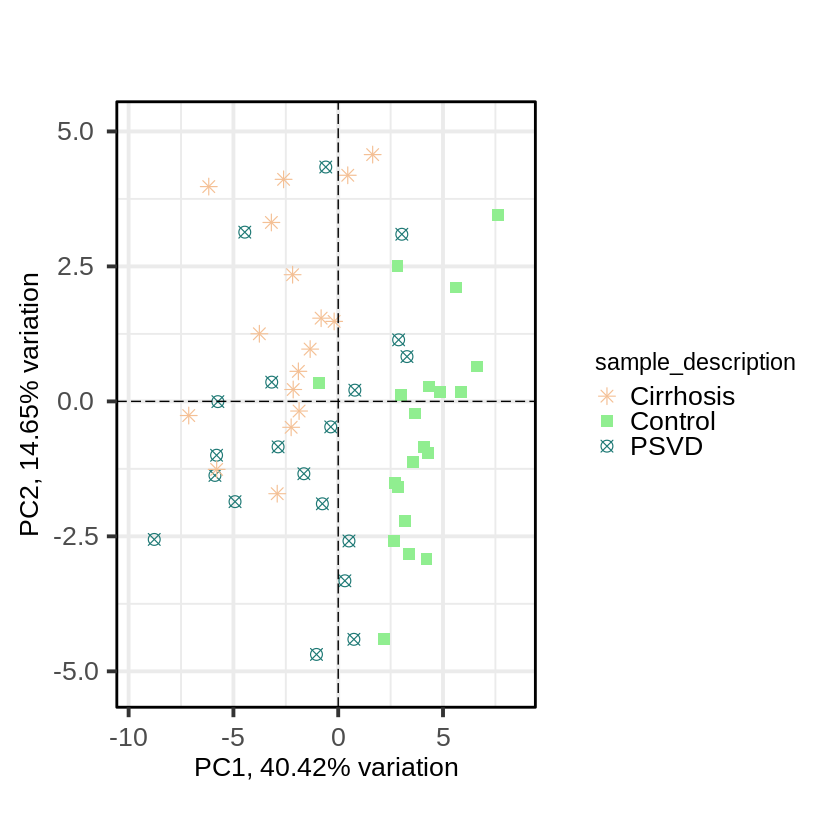

In [67]:
F1_B <- biplot(pca_calculated, lab = NULL, colby = "sample_description", colkey = c(Cirrhosis = "#F4C095",
  PSVD = "#1D7874", Control = "#90EE90"), shape = "sample_description", shapekey = c(`Cirrhosis` = 8, `PSVD` = 13, Control = 15), hline = 0, vline = 0, legendPosition = "right", legendLabSize = 16,
  legendIconSize = 3)

F1_B

In [69]:
F1_B_s <- plotloadings(pca_calculated, components = getComponents(pca_calculated,
  c(1, 2)), rangeRetain = 0.10, labSize = 4, title = "Loadings plot", subtitle = "Principal components 1 and 2",
  caption = "Top variables", shape = 24, col = c("limegreen", "black", "red3"),
  drawConnectors = TRUE)

-- variables retained:

pyruvic_acid, ce_20_4, glutamic_acid, isovaleric_acid_3_me_4_0, aspartic_acid, tag_46_1, tag_48_1, tag_48_2, tag_50_1, tag_50_2, tag_50_0, glutamine, pe_o_38_5



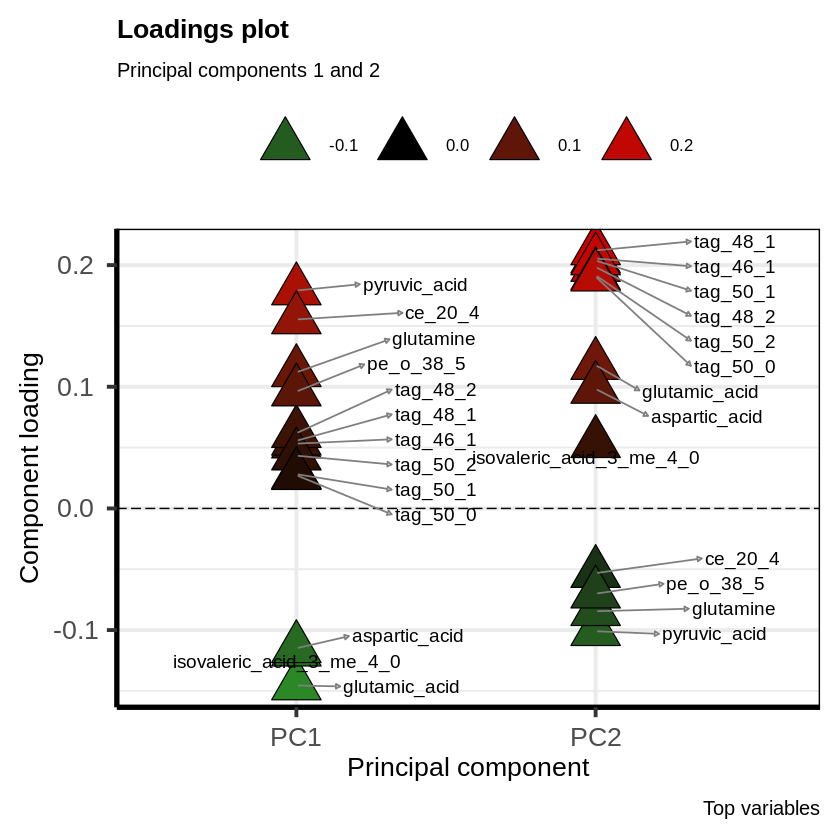

In [70]:
F1_B_s

## Heatmap

In [72]:
pcs <- c("pyruvic_acid", "ce_20_4", "glutamic_acid", "isovaleric_acid_3_me_4_0", "aspartic_acid", "tag_46_1", "tag_48_1", "tag_48_2", "tag_50_1", "tag_50_2", "tag_50_0", "glutamine", "pe_o_38_5")

In [211]:
pcs <- c('tyrosine', 'tauroholic acid')

In [212]:
mat <- as.data.frame(assay(metabolomics_obj))
mat <- mat %>% as.matrix()
mat <- mat[pcs,]

In [213]:
colData(metabolomics_obj)

DataFrame with 57 rows and 4 columns
      sample_description group_123       sex       age
                <factor> <integer> <integer> <numeric>
2341           Cirrhosis         1         1      44.7
2344           Cirrhosis         1         1      40.8
2358           PSVD              2         2      34.3
2360           Cirrhosis         1         2      48.5
2390           PSVD              2         2      40.3
...                  ...       ...       ...       ...
CON22            Control         3         1      64.3
CON23            Control         3         2      63.5
CON24            Control         3         1      55.8
CON25            Control         3         2      52.1
CON26            Control         3         1      57.7

In [214]:
ann <- colData(metabolomics_obj)
#ann$sample_description <- as.factor(ann$sample_description)
#ann$sample_description <- relevel(ann$sample_description, "Control")
#ann$sample_description <- relevel(ann$sample_description, "Cirrhosis")
#ann$sample_description <- relevel(ann$sample_description, "PSVD")
ann <- as.data.frame(ann) %>% arrange(group_123)

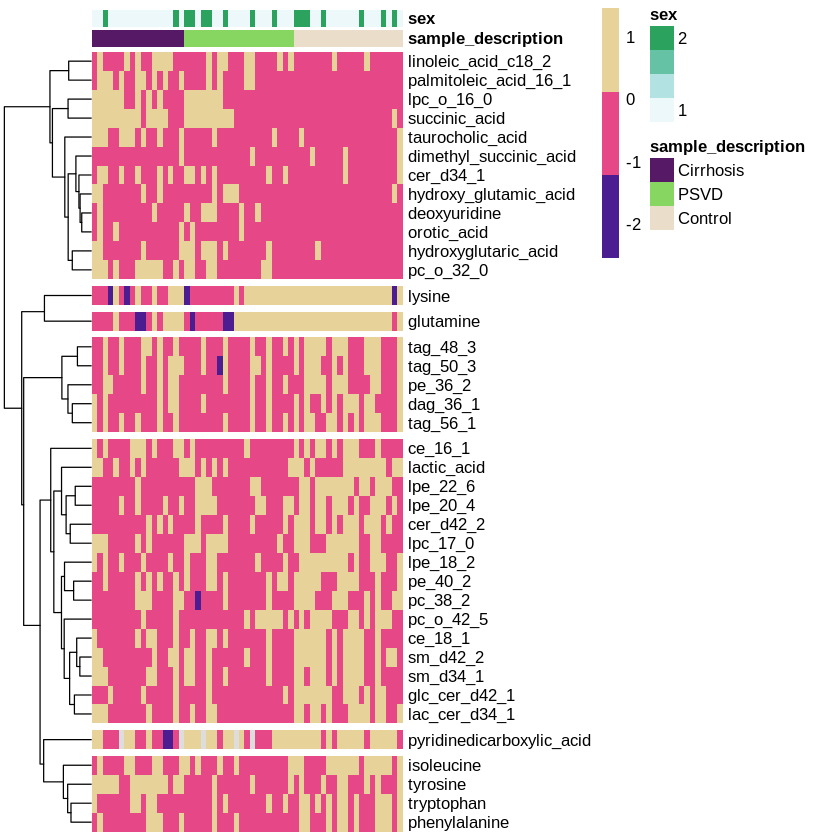

In [215]:
annotation <- as.data.frame(ann[, c("sample_description", "sex")])


ann_colors <- list(sample_description = c('Cirrhosis' = "#561965", 'PSVD' = "#87d662", 'Control' = "#EADDCA"))

mat <- mat[, (row.names(ann))]

F1_A <- pheatmap(mat, color = hcl.colors(3, "ag_Sunset", rev = FALSE), cluster_rows = TRUE,
  show_rownames = TRUE, cluster_cols = F,
  show_colnames = FALSE, annotation_col = annotation, annotation_colors = ann_colors, clustering_method = "ward.D2",
  cutree_rows = 7)